In [89]:
import pandas as pd
import geopandas as gpd
import contextily as ctx # for basemaps
from matplotlib import pyplot as plt
import folium
import numpy as np
!pip install fiona
import fiona; fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [96]:
#create df
migrants = pd.read_csv('missing_migrants.csv')

#drop N/A values
migrants= migrants.dropna(subset=['reported_date'])
migrants= migrants.dropna(subset=['number_of_survivors'])

#filter for 2023 data
migrants_2023= migrants[migrants['reported_date'].str.contains('2023')]

#sort by date
migrants_2023= migrants_2023.sort_values('reported_date')

#create lat and lon columns
migrants_2023[['latitude', 'longitude']] = migrants_2023['location_coodinates'].str.split(',',expand=True)

#convert values to float
migrants_2023['latitude'] = migrants_2023['latitude'].astype(float)
migrants_2023['longitude'] = migrants_2023['longitude'].astype(float)

migrants_2023

,web_id,region,reported_date,number_dead,number_missing,total_dead_and_missing,number_of_survivors,number_of_female,number_of_male,number_of_children,...,country_of_incident,location_description,unsd_geographic_grouping,location_coodinates,migration_route,information_source,url,source_quality,latitude,longitude
15836,2023.MMP0002,Europe,2023-01-01,1.0,NaN,1,15.0,NaN,NaN,NaN,...,Greece,Egnatia Highway between Alexandroupolis and Ko...,Southern Europe,"40.95496299, 25.65250242",NaN,"Ekathimerini, Amna Greece, Infomigrants","https://archive.ph/IBpVf, https://archive.ph/a...",3,40.954963,25.652502
15832,2023.MMP0007,Mediterranean,2023-01-02,1.0,NaN,1,176.0,NaN,1.0,NaN,...,Libya,"Off Garabulli (Castelverde), Libya - embarkati...",Uncategorized,"32.84183165, 13.69131602",Central Mediterranean,"IOM Libya, Foroyaa",https://archive.ph/NqgVc#selection-2043.34-204...,4,32.841832,13.691316
15829,2023.MMP0001,Mediterranean,2023-01-02,NaN,2.0,2,38.0,NaN,2.0,NaN,...,Greece,During pushback at unidentified location near ...,Uncategorized,"37.69253013, 26.99162098",Eastern Mediterranean,IOM Türkiye,NaN,4,37.692530,26.991621
15816,2023.MMP1201,Western Asia,2023-01-04,2.0,NaN,2,6.0,NaN,2.0,NaN,...,Saudi Arabia,Unspecified location by the Yemeni border in S...,Western Asia,"18.28006466, 48.35332592",Eastern Route to/from EHOA,Humanitarian partners,NaN,4,18.280065,48.353326
15797,2023.MMP0006,Mediterranean,2023-01-06,5.0,10.0,15,20.0,NaN,NaN,NaN,...,Tunisia,"Off the coast of La Laouata, Sfax, Tunisia\n",Uncategorized,"35.04940045, 11.06064712",Central Mediterranean,"Reuters, Diwan FM","https://archive.vn/lxFSc, https://archive.vn/1...",3,35.049400,11.060647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13163,2023.MMP1340,Northern Africa,2023-12-28,1.0,13.0,14,44.0,8.0,NaN,1.0,...,Western Sahara,"Around 42km from the coast of Boujdour, Wester...",Northern Africa,"26.16317455, -14.935918",Western Africa / Atlantic route to the Canary ...,"EFE, El dia, Caminando Fronteras","https://archive.ph/f0Ljt, https://archive.ph/O...",4,26.163175,-14.935918
13159,2023.MMP1341,Mediterranean,2023-12-29,1.0,NaN,1,132.0,NaN,1.0,NaN,...,Italy,"The boat set off from Zuwara, Libya and the de...",Uncategorized,"34.286215, -12.346598",Central Mediterranean,"Giornale di Sicilia, Sky tg24, Lasicilia.web",https://agrigento.gds.it/articoli/cronaca/2023...,3,34.286215,-12.346598
13157,2023.MMP1335,Mediterranean,2023-12-29,15.0,28.0,43,27.0,NaN,NaN,NaN,...,Libya,"Off Sabratha, Libya - embarkation from Sabratha\n",Uncategorized,"34.27484061, 13.0228668",Central Mediterranean,IOM Libya,NaN,4,34.274841,13.022867
13153,2023.MMP1345,Mediterranean,2023-12-30,4.0,NaN,4,1100.0,NaN,NaN,4.0,...,Spain,"In the area of Mariouari, near Beni Ansar, at ...",Uncategorized,"35.300969, -2.968135",Western Mediterranean,"IOM Morocco, AMDH Nador, Nadorcity",https://twitter.com/NadorAmdh/status/174219251...,4,35.300969,-2.968135


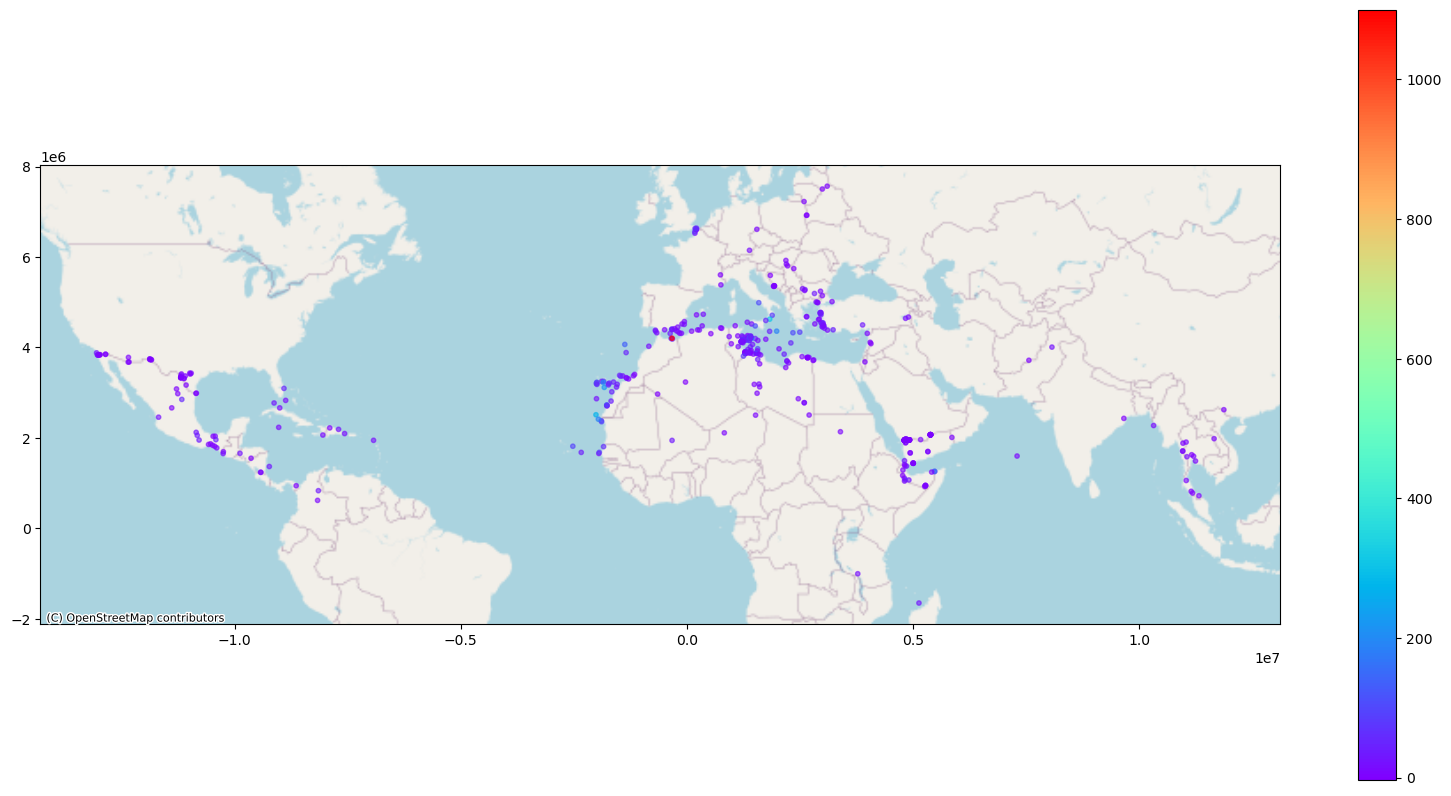

In [97]:
#create gdf from lat and lon columns
migrants_2023_gdf = gpd.GeoDataFrame(migrants_2023,geometry=gpd.points_from_xy(migrants_2023['longitude'],migrants_2023['latitude']))

#assign gdf a crs
migrants_2023_gdf.crs='epsg:4326'

#convert data to web mercator for basemap
migrants_2023_gdf = migrants_2023_gdf.to_crs('epsg:3857')

# plot the data
ax = migrants_2023_gdf.plot(figsize=(20,10), alpha=0.6, markersize=10.,cmap='rainbow',column='number_of_survivors', legend=True)
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)
